In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import pickle
from matplotlib import pyplot as plt
import numpy as np
from sklearn import model_selection
from cardiac_rythm import preprocessing

Load the test data with same seed as when the model was trained.

In [15]:
rng = np.random.RandomState(0)
# Load data and create dataframe
df = preprocessing.load_data("/home/halli/ux/BMDLab/matlab/resprog/GUI/CleanCutsDL/cutDataCinCTTI_rev_v2.mat")


x = np.stack(df["s_ecg"].to_numpy())
x = x.reshape((*x.shape, 1))
y = df["c_label"].to_numpy()
y = y - 1  # 0-4 instead of 1-5

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x,
    y,
    test_size=0.1,
    random_state=rng,
    stratify=y,
)

In [25]:
directory = "../results/n_filters=2_n_fc=2/trial_000"
fold = 0

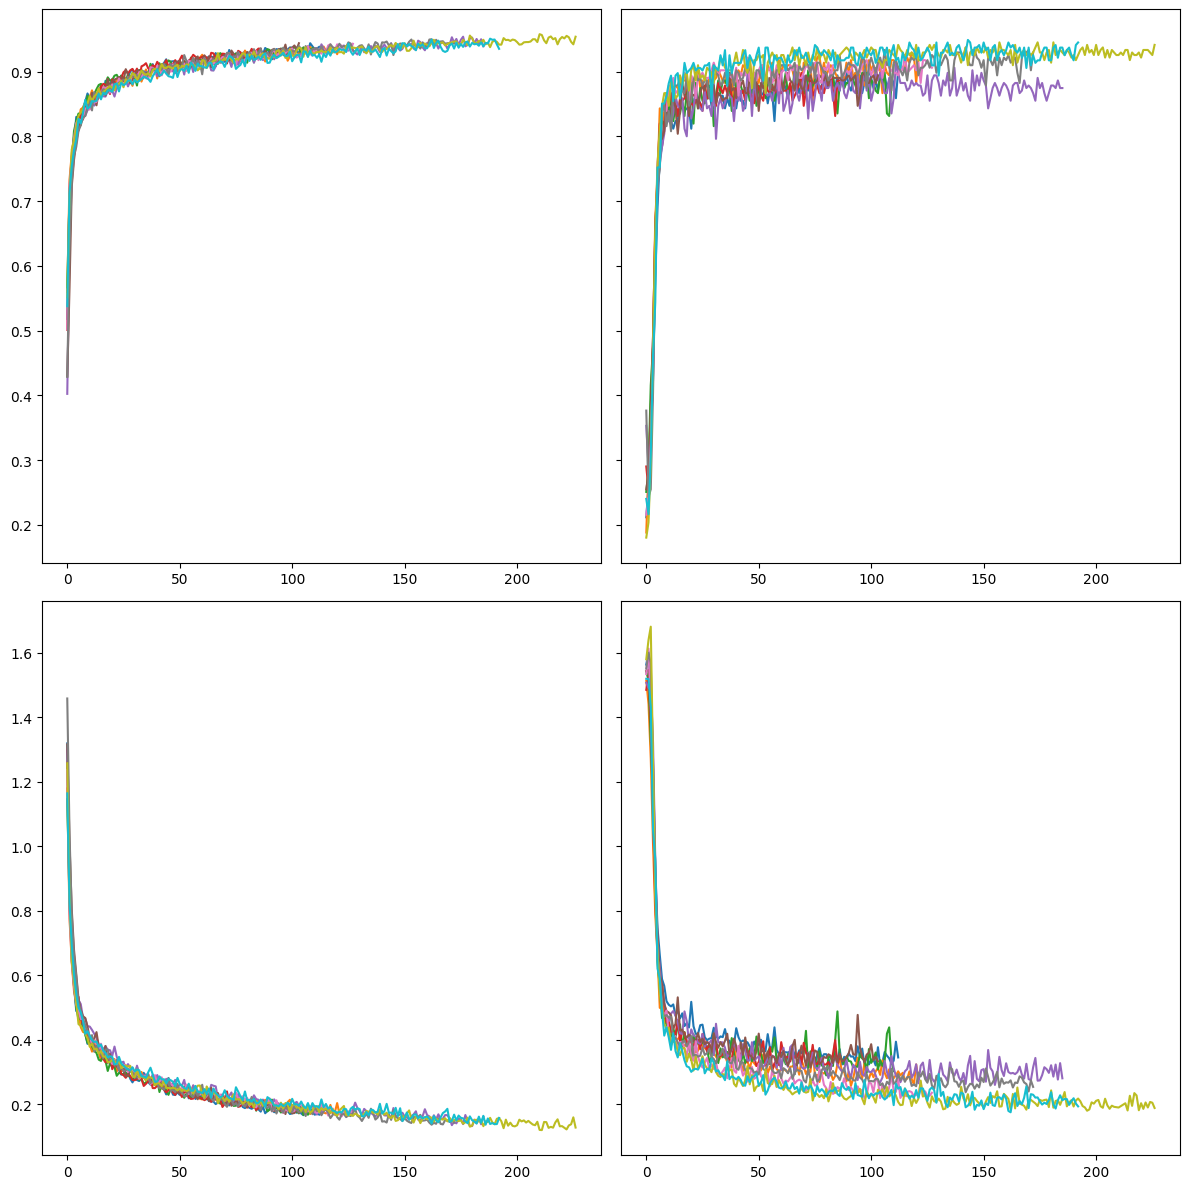

In [68]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharey="row")
ax = ax.ravel()
for fold in range(10):
    with open(f"{directory}/history_dict_{fold}", 'rb') as f:
        history = pickle.load(f)
        ax[0].plot(history["accuracy"], label="training accuracy")
        ax[1].plot(history["val_accuracy"], label="validation accuracy")
        ax[2].plot(history["loss"], label="training accuracy")
        ax[3].plot(history["val_loss"], label="validation accuracy")
#plt.legend(loc="upper left")

fig.tight_layout()
plt.show()

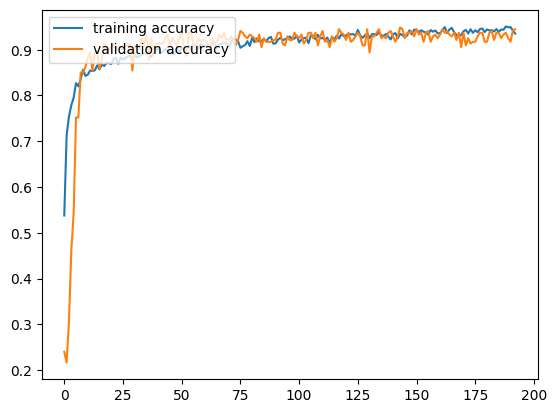

In [51]:
plt.plot(history["accuracy"], label="training accuracy")
plt.plot(history["val_accuracy"], label="validation accuracy")
plt.legend(loc="upper left")
plt.show()

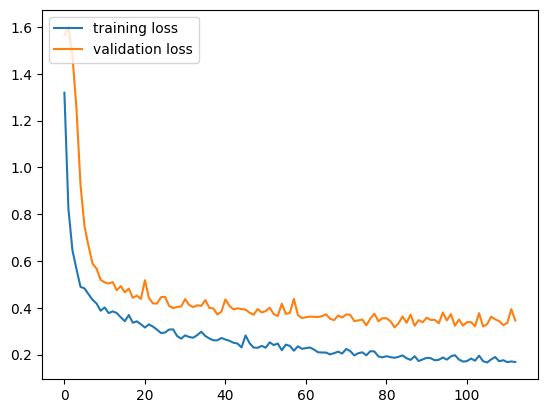

In [28]:
plt.plot(history["loss"], label="training loss")
plt.plot(history["val_loss"], label="validation loss")
plt.legend(loc="upper left")
plt.show()

In [30]:
from cardiac_rythm.models import CNN, CNNConfig


saved_model = f"{directory}/checkpoint"

with open(f"{directory}/model_config.json", "rt") as f:
    model_config = CNNConfig.from_json(f.read())
model = CNN(model_config)
model.load_weights(saved_model)
prediction = np.argmax(model.predict(x_test), axis=1)

9/9 [==============================] - 0s 8ms/step


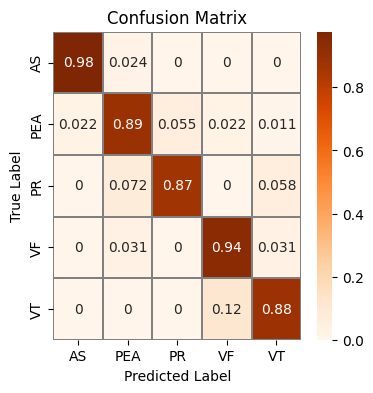

In [31]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
import seaborn as sns

conf_matrix = confusion_matrix(y_test, prediction)
norm = conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]
bac = balanced_accuracy_score(y_test, prediction)

f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(norm, annot=True, linewidths=0.01, cmap="Oranges", linecolor="gray")
ax.xaxis.set_ticklabels(["AS", "PEA", "PR", "VF", "VT"])
ax.yaxis.set_ticklabels(["AS", "PEA", "PR", "VF", "VT"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [32]:
accuracy = conf_matrix.diagonal().sum()/conf_matrix.sum()
precision = conf_matrix.diagonal()/conf_matrix.sum(axis=0)
recall = conf_matrix.diagonal()/conf_matrix.sum(axis=1)

In [33]:
accuracy

0.9084507042253521

In [56]:
bac

0.9113360126659359